### 1. DT를 이용

#### 와인 등급을 분류하는 모델을 만들어 시각화한 후, 모델 성능을 평가하시오.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
wine = datasets.load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3,
                                                   random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


In [8]:
from sklearn import tree

In [9]:
clf = tree.DecisionTreeClassifier()
clf_df = clf.fit(x_train, y_train)

In [10]:
y_pred = clf.predict(x_test)

In [11]:
y_pred

array([2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2,
       0, 0, 0, 1, 1, 0, 2, 0, 0, 1])

In [12]:
cfmat = confusion_matrix(y_test, y_pred)
print(cfmat)

[[18  0  0]
 [ 0 21  0]
 [ 0  1 14]]


In [13]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9814814814814815


In [14]:
import graphviz

In [15]:
dot_data = tree.export_graphviz(clf_df, out_file=None,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)

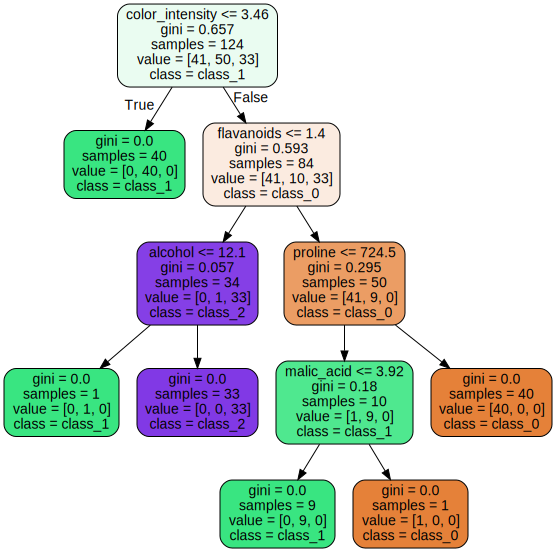

In [16]:
graph

In [17]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")

In [18]:
clf2_dt = clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)

print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[17  1  0]
 [ 0 21  0]
 [ 0  1 14]]
0.9629629629629629


In [19]:
dot_data2 = tree.export_graphviz(clf2_dt, out_file=None,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph2 = graphviz.Source(dot_data2)

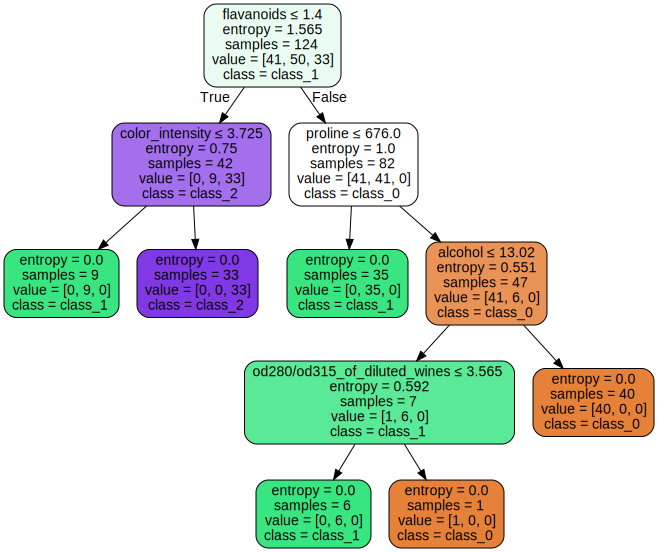

In [20]:
graph2

In [21]:
clf3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [22]:
clf3_dt = clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)

print(confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

[[18  0  0]
 [ 3 18  0]
 [ 0  1 14]]
0.9259259259259259


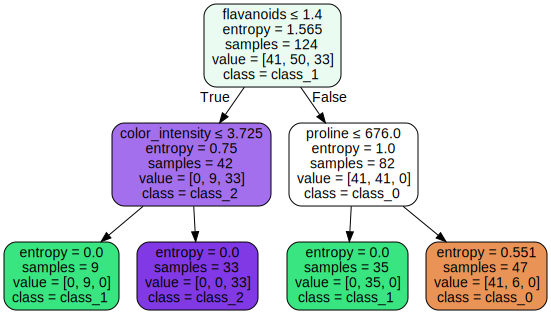

In [23]:
dot_data3 = tree.export_graphviz(clf3_dt, out_file=None,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph3 = graphviz.Source(dot_data3)
graph3

In [24]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred2))
print(accuracy_score(y_test, y_pred3))

0.9814814814814815
0.9629629629629629
0.9259259259259259


In [25]:
accuracy_score(wine.target,clf.predict(wine.data))

0.9943820224719101

In [26]:
accuracy_score(wine.target,clf2.predict(wine.data))

0.9887640449438202

In [27]:
accuracy_score(wine.target,clf3.predict(wine.data))

0.9438202247191011

### <더 나아가기>
#### 과제까지 모두 하신 분들 중 더 연습 하고 싶다면... 
1. (wine) 속성 데이터들을 정규화시켜 DT 모형에 적합시키고, 정규화하지 않은 데이터와 성능 비교
2. (titanic) DT 모형 적합시키고, 속성값들 변경하며 성능 비교